<h1><center><span style="color:#369;background:#fdf;padding: 10px 30px 10px 30px;border: 3px solid #369;border-radius:7px;">TP parcours des graphes et applications</span></center></h1>

## Objectif
Nous allons utiliser la classe Graphe du dernier TP (celle avec le dictionnaire d'adjacence) puis implémenter les parcours en profondeur et en largeur et voir quelques applications de ces parcours.

## Parcours d'un graphe à la main
On considère le graphe <code>G</code> suivant
![graphes_parcours_0.png](https://ericecmorlaix.github.io/img/graphes_parcours_0.png)

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 1
    
On choisit de partir de A.
    
Réaliser à la main un parcours en largeur du graphe (on insérera dans la file les sommets par ordre alphabétique), en indiquant les états successifs de la file. Donner à la fin la liste des sommets parcourus.

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 2
    
Même question en partant de H.

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 3
    
Même question pour le parcours en profondeur (donc avec une pile) en partant de A.

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 4
    
Même question en partant de H.

## Implémentation des parcours
On donne ci-dessous les classes <code>File</code>, <code>Pile</code> et <code>Graphe</code> dont on utilisera les méthodes. La classe Graphe utilise le dictionnaire d'adjacence.

Exécuter les deux cellules suivantes.

In [2]:
# Import de graphviz pour l'affichage des graphes.
from graphviz import Graph

In [4]:
class File:
    '''Une implémentation basique à l'aide d'une liste python'''
    def __init__(self):
        self.liste=[]
    def estVide(self):
        return self.liste==[]
    def enfile(self,e):
        self.liste.append(e)
    def defile(self):
        return self.liste.pop(0)
class Pile:
    '''Une implémentation basique à l'aide d'une liste python'''
    def __init__(self):
        self.liste=[]
    def estVide(self):
        return self.liste==[]
    def empile(self,e):
        self.liste.append(e)
    def depile(self):
        return self.liste.pop()
class Graphe:    
    def __init__(self):
        self.d = dict() # dictionnaire d'adjacence 
    def ajoute_sommet(self,s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet''' 
        if s not in self.d :
            self.d[s] = []
    def ajoute_arete(self,s,t):
        '''Ajoute si nécessaire les sommets s et t puis crée si elle n'existait pas une arête entre s et t'''
        self.ajoute_sommet(s)
        self.ajoute_sommet(t)
        if t not in self.d[s]:
            self.d[s].append(t)
        if s not in self.d[t]:
            self.d[t].append(s)
    def arete(self,s,t):
        '''Renvoie True s'il y a une arête entre s et t et False sinon'''
        return (t in self.d[s])
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        return list(self.d.keys())
    def voisins(self,s):
        '''Renvoie la liste des voisins de s'''
        return self.d[s]
    def affiche(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Graph('G')
        for s in self.sommets():
            for t in self.voisins(s): 
                # Condition pour éviter les doubles arêtes
                if '{} -- {}'.format(t,s) not in dot.source:
                    dot.edge(s,t)
        return dot

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 5
    
Compléter le code ci-dessous pour instancier et représenter le graphe G plus haut. La liste L est la liste des arêtes du graphe : s'en servir pour instancier le graphe.

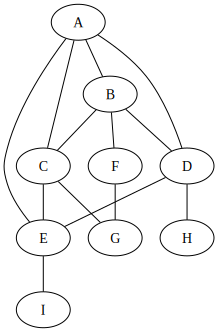

In [6]:
L=[('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('B','D'),('B','F'),('C','E'),('C','G'),('D','E'),('D','H'),('E','I'),('F','G')]
G=Graphe()
for u,v in L :
    G.ajoute_arete(u,v)
G.affiche()

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 6
    
On rappelle l'algorithme parcoursLargeur :

![graphes_parcours_6.png](https://ericecmorlaix.github.io/img/graphes_parcours_6.png)

Compléter la fonction parcoursLargeur ci-dessous et la tester

In [ ]:
def parcoursLargeur(G,s):
    ''' In : un graphe G et un sommet s
        Out: la liste du parcours en largeur'''
    F=File()
    L=[] # la liste des sommets visités que l'on va retourner
    marque={s:False for s in G.sommets()}
    F.enfile(s)
    marque[s] = True
    while not F.estVide() :
        u = F.defile()
        print(u)
        

In [ ]:
# jeu de tests (on vérifiera les réponses aux questions 1 et 2)


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert parcoursLargeur(GTest,0)==[0, 1, 3, 5, 7, 9, 2, 4, 6, 8]
assert parcoursLargeur(GTest,1)==[1, 0, 2, 4, 6, 8, 3, 5, 7, 9]

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 7
    
On rappelle l'algorithme parcoursProfondeur :

![graphes_parcours_7.png](https://ericecmorlaix.github.io/img/graphes_parcours_7.png)

Compléter la fonction parcoursProfondeur ci-dessous et la tester

In [ ]:
def parcoursProfondeur(G,s):
    ''' In : un graphe G et un sommet s
        Out: la liste du parcours en profondeur'''
    pass

In [ ]:
# jeu de tests (on vérifiera les réponses aux questions 1 et 2)


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert parcoursProfondeur(GTest,0)==[0, 9, 8, 6, 4, 2, 7, 5, 3, 1]
assert parcoursProfondeur(GTest,1)==[1, 8, 9, 7, 5, 3, 6, 4, 2, 0]

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 7
    
Compléter la version récursive du parcours en profondeur ci-dessous et la tester (attention, le parcours ne sera pas le même que ParcoursProfondeur, mais le but est de parcourir tous les sommets du graphe)
    
La liste dejaVu qui est en paramètre va se remplir peu à peu, c'est elle que l'on retournera

In [ ]:
def parcoursProfondeur_rec(G,s,dejaVu=[]):
    ''' In : un graphe G, un sommet s, une liste des sommets déjà visités
        Out: la liste du parcours en profondeur'''
    dejaVu.append(s) # on commence par dire que s a été visité
    for v in G.voisins(s):# pour tous les voisins v de s
        if not (v in dejaVu):# si v n'a pas été visité
            ... # on parcourt récursivement à partir de v
    return dejaVu

In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert parcoursProfondeur_rec(GTest,0,[])==[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert parcoursProfondeur_rec(GTest,1,[])==[1, 0, 3, 2, 5, 4, 7, 6, 9, 8]

## 1ère application d'un parcours : détecter si un graphe est connexe ou pas

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 8
    
A l'image de l'instanciation du graphe G fait plus haut, créer un graphe G1 non connexe et le dessiner

In [ ]:
G1=Graphe()
# à compléter

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 9
    
Compléter la fonction suivante qui teste si un graphe est connexe ou pas, puis la tester.
    
<details style ="background-color: Silver;">
   <summary > Cliquez ici pour un indice  </summary>
il suffit de reprendre un des parcours vus, de choisir un sommet quelconque s et de comparer ...
</details>
</div>

In [ ]:
def estConnexe(G):
    ''' In : un graphe G non vide
        Out: True si G est connexe, False sinon'''
    pass

In [ ]:
# Jeu de tests de la fonction estConnexe


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
GTestBis=Graphe()
for i in range(9):
    for j in range(i+1,10):
        GTestBis.ajoute_arete(i,j)
for i in range(10,19):
    for j in range(i+1,20):
        GTestBis.ajoute_arete(i,j) 
assert estConnexe(GTest)==True
assert estConnexe(GTestBis)==False

## Application du parcours en largeur : calculer la distance entre 2 sommets
On rappelle que la distance entre deux sommets s et t d'un graphe non orienté est la longueur de la plus petite chaîne reliant  s et t

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 10
    
Compléter la fonction suivante qui renvoie le dictionnaire donnant les distances entre un sommet s donné et tous les autres sommets du graphe atteignables par s

In [ ]:
def distances(G,s):
    ''' In : un graphe G non orienté et un sommet s
        Out: le dictionnaire donnant la distance entre s et les autres sommets atteignables par s'''
    F=File()
    d=dict() # le dictionnaire en question
    F.enfile(s)
    d[s]=0 # la distance de s à s est 0, cela permet également de marquer s
    pass

In [ ]:
# Jeu de tests de la fonction distances


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert distances(GTest,0)=={0: 0, 1: 1, 3: 1, 5: 1, 7: 1, 9: 1, 2: 2, 4: 2, 6: 2, 8: 2}
assert distances(GTest,1)=={1: 0, 0: 1, 2: 1, 4: 1, 6: 1, 8: 1, 3: 2, 5: 2, 7: 2, 9: 2}

## Application du parcours en profondeur : détecter un cycle

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 11
    
A l'image de l'instanciation du graphe G fait plus haut, créer un graphe G2 acyclique (càd sans cycle), par exemple un arbre et le dessiner

In [ ]:
G2=Graphe()
# à compléter

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 12

On donne l'algorithme détectionCycle :

![graphes_parcours_12.png](https://ericecmorlaix.github.io/img/graphes_parcours_12.png)
   
Adapter cet algorithme (pour qu'il puisse fonctionner avec des sommets autres que des entiers de 0 à n) en prenant non pas une liste de prédecesseurs mais un dictionnaire puis compléter la fonction suivante qui détecte s'il y a un cycle ou non, et enfin la tester

In [ ]:
def detectionCycle(G,s):
    ''' In : un graphe G non orienté et un sommet s
        Out: True s'il n'y a pas de cycle atteignable par s, et False sinon'''
    P=Pile()
    Pred=dict() # le dictionnaire des prédecesseurs (inutile d'initialiser à -1 puisqu'il est vide)
    P.empile(s)
    Pred[s]=s
    pass

In [ ]:
# Jeu de tests de la fonction detectionCycle


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,20,2):
    GTest.ajoute_arete(i,i+1)
    GTest.ajoute_arete(i+1,i+2)
assert detectionCycle(GTest,0)==False
GTest.ajoute_arete(0,19)
assert detectionCycle(GTest,0)==True

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 13

Compléter la fonction suivante qui teste si le graphe donné est un arbre ou pas.

Challenge : à faire sur 1 seule ligne (si c'est possible en utilisant les fonctions précédentes et sans compter la docstring évidemment)

In [ ]:
def estUnArbre(G):
    ''' In : un graphe G non orienté
        Out: True si G est un arbre et False sinon'''
    pass

In [ ]:
# Jeu de tests de la fonction estUnArbre


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,20,2):
    GTest.ajoute_arete(i,i+1)
    GTest.ajoute_arete(i+1,i+2)
assert estUnArbre(GTest)==True
GTest.ajoute_arete(0,19)
assert estUnArbre(GTest)==False
GTestBis=Graphe()
for i in range(9):
    for j in range(i+1,10):
        GTestBis.ajoute_arete(i,j)
for i in range(10,19):
    for j in range(i+1,20):
        GTestBis.ajoute_arete(i,j) 
assert estUnArbre(GTestBis)==False

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 14

Représenter le graphe donné en cours noté G3 en vous aidant de son dictionnaire d'adjacence donné ci-dessous

In [ ]:
d3={'0': ['1', '2', '8'], '1': ['0', '4', '5'], '2': ['0', '4', '5'], '3': ['5', '6'], '4': ['1', '2', '8'], '5': ['1', '2', '3', '7', '8'], '6': ['3', '8', '9'], '7': ['5', '8'], '8': ['0', '4', '5', '6', '7'], '9': ['6']}
G3=Graphe()
# à compléter

<div style="padding:10px ;border:solid 4px lightblue; border-radius: 10px; background-color:aliceblue;">

### Question 15

Compléter la fonction suivante (seulement 2 lignes) qui renvoie une chaîne contenant le 1er cycle détecté en partant d'un sommet s donné

In [ ]:
def premierCycle(G,s):
    ''' In : un graphe G non orienté et un sommet s
        Out: renvoie sous forme de liste une chaîne contenant le 1er cycle détecté atteignable par s
             Si G n'a pas de cycle, renvoie une liste vide'''
    P=Pile()
    Pred=dict() # le dictionnaire des prédecesseurs (inutile d'initialiser à -1 puisqu'il est vide)
    P.empile(s)
    Pred[s]=s
    while not P.estVide():
        u=P.depile()
        for v in G.voisins(u):
            if not (v in Pred):
                Pred[v]=u
                P.empile(v)
            elif v!=Pred[u]:# Le cycle est alors s-....-Pred[u]-u-v-Pred[v]-...-s
                # on cherche tous les sommets : u - Pred[u] - ... - s
                L=[u]
                sommet_courant=u
                while sommet_courant!=s:
                    sommet_courant=...
                    L.append(sommet_courant)
                # maintenant, on cherche tous les sommets : v - Pred[v] - ... - s
                sommet_courant=v
                while sommet_courant!=s:
                    L.insert(0,sommet_courant) # pour insérer par la gauche
                    sommet_courant=...
                return L
    return []

In [ ]:
# Jeu de tests (on pensera à tester le graphe G3 pour vérifier l'exercice 17 du cours)


In [ ]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,20,2):
    GTest.ajoute_arete(i,i+1)
    GTest.ajoute_arete(i+1,i+2)
assert premierCycle(GTest,0)==[]
GTest.ajoute_arete(0,19)
assert premierCycle(GTest,0)==[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0]